# ch04. RNN(순환신경망)

## 1. 문맥을 이용하여 모델 만들기

In [17]:
text = """경마장에 말이 뛰고 있다.
그의 말이 법이다.
가는 말이 고와야 오는 말이 곱다."""

In [18]:
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text])
encoded = t.texts_to_sequences([text])[0]
print(encoded)
print(t.word_index)

[2, 1, 3, 4, 5, 1, 6, 7, 1, 8, 9, 1, 10]
{'말이': 1, '경마장에': 2, '뛰고': 3, '있다': 4, '그의': 5, '법이다': 6, '가는': 7, '고와야': 8, '오는': 9, '곱다': 10}


In [19]:
t.texts_to_sequences(['경마장에 말이 있다'])[0]

[2, 1, 4]

In [32]:
sequences=[]
for line in text.split('\n'):
    encoded = t.texts_to_sequences([line])[0]
    print('원래 문장 : ', line)
    print('encoded된 문장 : ', encoded)
    for i in range(0, len(encoded)-1): # 시작 index
        for j in range(i+2,len(encoded)+1):
            sequences.append(encoded[i:j])
print('sequences와 해석 출력')
for sequence in sequences:
    print('[',end='')
    for word_seq in sequence:
        for key, value in t.word_index.items():
            if word_seq==value:
                print("{}:{}".format(word_seq,key),end=' ')
    print(']')
        

원래 문장 :  경마장에 말이 뛰고 있다.
encoded된 문장 :  [2, 1, 3, 4]
원래 문장 :  그의 말이 법이다.
encoded된 문장 :  [5, 1, 6]
원래 문장 :  가는 말이 고와야 오는 말이 곱다.
encoded된 문장 :  [7, 1, 8, 9, 1, 10]
sequences와 해석 출력
[2:경마장에 1:말이 ]
[2:경마장에 1:말이 3:뛰고 ]
[2:경마장에 1:말이 3:뛰고 4:있다 ]
[1:말이 3:뛰고 ]
[1:말이 3:뛰고 4:있다 ]
[3:뛰고 4:있다 ]
[5:그의 1:말이 ]
[5:그의 1:말이 6:법이다 ]
[1:말이 6:법이다 ]
[7:가는 1:말이 ]
[7:가는 1:말이 8:고와야 ]
[7:가는 1:말이 8:고와야 9:오는 ]
[7:가는 1:말이 8:고와야 9:오는 1:말이 ]
[7:가는 1:말이 8:고와야 9:오는 1:말이 10:곱다 ]
[1:말이 8:고와야 ]
[1:말이 8:고와야 9:오는 ]
[1:말이 8:고와야 9:오는 1:말이 ]
[1:말이 8:고와야 9:오는 1:말이 10:곱다 ]
[8:고와야 9:오는 ]
[8:고와야 9:오는 1:말이 ]
[8:고와야 9:오는 1:말이 10:곱다 ]
[9:오는 1:말이 ]
[9:오는 1:말이 10:곱다 ]
[1:말이 10:곱다 ]


In [33]:
print([len(s) for s in sequences])

[2, 3, 4, 2, 3, 2, 2, 3, 2, 2, 3, 4, 5, 6, 2, 3, 4, 5, 2, 3, 4, 2, 3, 2]


In [34]:
maxlen = max([len(s) for s in sequences])
maxlen

6

In [35]:
# sequences를 훈련이 가능하도록 6개열로 조정
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences=sequences,
                         maxlen=maxlen,
                         padding='pre')
type(sequences), sequences.shape, sequences

(numpy.ndarray,
 (24, 6),
 array([[ 0,  0,  0,  0,  2,  1],
        [ 0,  0,  0,  2,  1,  3],
        [ 0,  0,  2,  1,  3,  4],
        [ 0,  0,  0,  0,  1,  3],
        [ 0,  0,  0,  1,  3,  4],
        [ 0,  0,  0,  0,  3,  4],
        [ 0,  0,  0,  0,  5,  1],
        [ 0,  0,  0,  5,  1,  6],
        [ 0,  0,  0,  0,  1,  6],
        [ 0,  0,  0,  0,  7,  1],
        [ 0,  0,  0,  7,  1,  8],
        [ 0,  0,  7,  1,  8,  9],
        [ 0,  7,  1,  8,  9,  1],
        [ 7,  1,  8,  9,  1, 10],
        [ 0,  0,  0,  0,  1,  8],
        [ 0,  0,  0,  1,  8,  9],
        [ 0,  0,  1,  8,  9,  1],
        [ 0,  1,  8,  9,  1, 10],
        [ 0,  0,  0,  0,  8,  9],
        [ 0,  0,  0,  8,  9,  1],
        [ 0,  0,  8,  9,  1, 10],
        [ 0,  0,  0,  0,  9,  1],
        [ 0,  0,  0,  9,  1, 10],
        [ 0,  0,  0,  0,  1, 10]]))

In [36]:
# 독립변수(X), 타겟변수(Y)로 분리
X = sequences[:,:-1]
Y = sequences[:,-1]
Y

array([ 1,  3,  4,  3,  4,  4,  1,  6,  6,  1,  8,  9,  1, 10,  8,  9,  1,
       10,  9,  1, 10,  1, 10, 10])

In [37]:
len(t.word_index)

10

In [38]:
# 원핫인코딩
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y,len(t.word_index)+1)
Y

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.

In [40]:
X.shape, Y.shape

((24, 5), (24, 11))

In [47]:
vocab_size=len(t.word_index)+1 # 원핫인코딩의 배열인덱스가 단어 집합의 크기보다 1 크다.
vocab_size

11

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.layers import Dense

model = Sequential()
# 희소행렬로 변환

model.add(Embedding(input_dim=vocab_size, output_dim=vocab_size-1, input_length=X.shape[1]))
model.add(SimpleRNN(32))
model.add(Dense(vocab_size, activation='softmax'))
# 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 모델 학습시키기
hist=model.fit(X,Y,epochs=300, verbose=2)


Epoch 1/300
1/1 - 1s - loss: 2.3997 - accuracy: 0.0000e+00
Epoch 2/300
1/1 - 0s - loss: 2.3897 - accuracy: 0.0417
Epoch 3/300
1/1 - 0s - loss: 2.3797 - accuracy: 0.0833
Epoch 4/300
1/1 - 0s - loss: 2.3696 - accuracy: 0.1667
Epoch 5/300
1/1 - 0s - loss: 2.3593 - accuracy: 0.2500
Epoch 6/300
1/1 - 0s - loss: 2.3488 - accuracy: 0.2917
Epoch 7/300
1/1 - 0s - loss: 2.3379 - accuracy: 0.3333
Epoch 8/300
1/1 - 0s - loss: 2.3268 - accuracy: 0.3333
Epoch 9/300
1/1 - 0s - loss: 2.3152 - accuracy: 0.4167
Epoch 10/300
1/1 - 0s - loss: 2.3031 - accuracy: 0.4167
Epoch 11/300
1/1 - 0s - loss: 2.2904 - accuracy: 0.4167
Epoch 12/300
1/1 - 0s - loss: 2.2772 - accuracy: 0.4167
Epoch 13/300
1/1 - 0s - loss: 2.2633 - accuracy: 0.4167
Epoch 14/300
1/1 - 0s - loss: 2.2488 - accuracy: 0.4167
Epoch 15/300
1/1 - 0s - loss: 2.2336 - accuracy: 0.4167
Epoch 16/300
1/1 - 0s - loss: 2.2177 - accuracy: 0.4167
Epoch 17/300
1/1 - 0s - loss: 2.2011 - accuracy: 0.4167
Epoch 18/300
1/1 - 0s - loss: 2.1838 - accuracy: 0.41

Epoch 147/300
1/1 - 0s - loss: 0.7042 - accuracy: 0.7917
Epoch 148/300
1/1 - 0s - loss: 0.6983 - accuracy: 0.7917
Epoch 149/300
1/1 - 0s - loss: 0.6925 - accuracy: 0.7917
Epoch 150/300
1/1 - 0s - loss: 0.6868 - accuracy: 0.7917
Epoch 151/300
1/1 - 0s - loss: 0.6812 - accuracy: 0.7917
Epoch 152/300
1/1 - 0s - loss: 0.6756 - accuracy: 0.7917
Epoch 153/300
1/1 - 0s - loss: 0.6702 - accuracy: 0.7917
Epoch 154/300
1/1 - 0s - loss: 0.6648 - accuracy: 0.7917
Epoch 155/300
1/1 - 0s - loss: 0.6595 - accuracy: 0.7917
Epoch 156/300
1/1 - 0s - loss: 0.6543 - accuracy: 0.7917
Epoch 157/300
1/1 - 0s - loss: 0.6491 - accuracy: 0.7917
Epoch 158/300
1/1 - 0s - loss: 0.6440 - accuracy: 0.7917
Epoch 159/300
1/1 - 0s - loss: 0.6390 - accuracy: 0.7917
Epoch 160/300
1/1 - 0s - loss: 0.6341 - accuracy: 0.7917
Epoch 161/300
1/1 - 0s - loss: 0.6292 - accuracy: 0.7917
Epoch 162/300
1/1 - 0s - loss: 0.6244 - accuracy: 0.8333
Epoch 163/300
1/1 - 0s - loss: 0.6197 - accuracy: 0.8333
Epoch 164/300
1/1 - 0s - loss: 

Epoch 291/300
1/1 - 0s - loss: 0.3067 - accuracy: 0.8750
Epoch 292/300
1/1 - 0s - loss: 0.3058 - accuracy: 0.8750
Epoch 293/300
1/1 - 0s - loss: 0.3050 - accuracy: 0.8750
Epoch 294/300
1/1 - 0s - loss: 0.3041 - accuracy: 0.8750
Epoch 295/300
1/1 - 0s - loss: 0.3032 - accuracy: 0.8750
Epoch 296/300
1/1 - 0s - loss: 0.3024 - accuracy: 0.8750
Epoch 297/300
1/1 - 0s - loss: 0.3016 - accuracy: 0.8750
Epoch 298/300
1/1 - 0s - loss: 0.3008 - accuracy: 0.8750
Epoch 299/300
1/1 - 0s - loss: 0.3000 - accuracy: 0.8750
Epoch 300/300
1/1 - 0s - loss: 0.2992 - accuracy: 0.8750


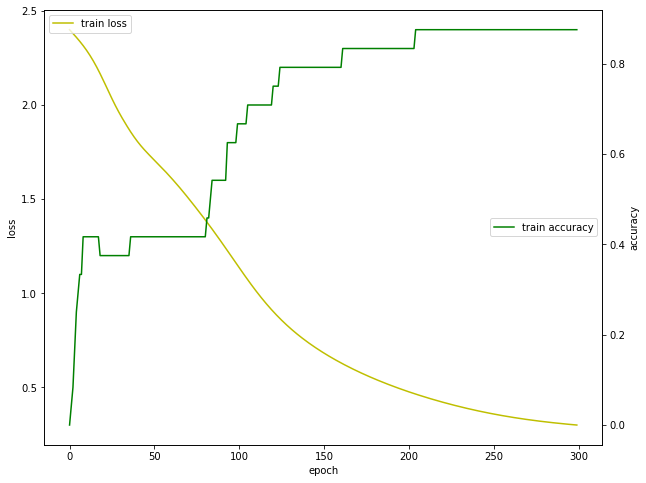

In [57]:
# 5. 모델의 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')

acc_ax = loss_ax.twinx() #loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [53]:
word = input("입력 단어 : ")
encoded = t.texts_to_sequences([word])[0]
input_data = pad_sequences([encoded], maxlen=5, padding='pre')
result = model.predict(input_data).argmax()
print(result)
for key, value in t.word_index.items():
    if value==result:
        print('예측된 단어 : ', key)
        break

입력 단어 : 경마장에
1
예측된 단어 :  말이


## 2. 다음 문맥 예측해 보기

In [66]:
# "경마장에"이후에 올 단어 "4"개 예측 -> 경마장에 있는 말이 뛰고
def sentence_generation(model, t, current_word, n):
    init_word = current_word
    print('입력된 단어 :', init_word)
    for i in range(1, n+1):
        encoded = t.texts_to_sequences([current_word])[0]
        input_data = pad_sequences([encoded], maxlen=5, padding='pre')
        result = np.argmax(model.predict(input_data))
        for word, value in t.word_index.items():
            if result == value:
                print("{}번째 {}:{}".format(i, word, result))
                current_word = current_word + ' ' + word
                break
    return current_word

In [68]:
sentence_generation(model, t, '경마장에', 3)

입력된 단어 : 경마장에
1번째 말이:1
2번째 뛰고:3
3번째 있다:4


'경마장에 말이 뛰고 있다'